# From Distributions to Hypotheses

## Learning Objectives

- To understand what a probability density function is.
- To calculate probabilities of observing specific values. 
- To understand the standard normal distribution and why its so helpful

# CodeAlong

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

# Calculating Probabilities and Probability Density Functions (with scipy)

In [ ]:
df = pd.read_csv("Data/weight-height.csv")
df

In [ ]:
## taking smaller sample for easier vis
sample = df.sample(n=1000, random_state=321)

In [ ]:
sns.barplot(data=sample, x='Gender',y='Height');

<!-- > Question:  -->

In [ ]:
group_means = sample.groupby('Gender')['Height'].mean()
group_means

In [ ]:
sns.countplot(data=sample, x='Gender')

In [ ]:
palette = {'Female':'tab:orange','Male':'tab:blue'}
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(data=sample, hue='Gender',x='Height',kde=True,stat='probability',
        ax=ax,palette=palette,common_norm=False,)

ax.axvline(group_means.loc['Male'], color=palette['Male'],ls='--',lw=5,
           label='Males')
ax.axvline(group_means.loc['Female'],color=palette['Female'],ls='--', lw=5,
           label='Females')
ax.legend();

In [ ]:
group_stats = sample.groupby('Gender')['Height'].agg(['mean','std','min','max'])
group_stats

### Generating a Distribution with Scipy

In [ ]:
# xs = x= np.linspace(curr_group.loc['min']-2, curr_group.loc['max']+2,)
# xs

In [ ]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data

In [ ]:
females = get_group_stats(sample, "Female",include_data=False)
females.keys()

In [ ]:
# females.pop('data')

In [ ]:
females.keys()

In [ ]:
## loop to save data for 
group_stats = {}

for gender in sample['Gender'].unique():
    
    group_stats[gender] = get_group_stats(sample,gender)

    
group_stats.keys()

In [ ]:
group_stats["Male"].keys()

In [ ]:
curr_group = group_stats['Male']
curr_group.keys()

In [ ]:
plt.plot(curr_group['xs'],curr_group['pdf'], label=curr_group['group_name'])
plt.legend()

In [ ]:
# ax = sns.histplot(data=sample.loc[df['Gender']=='Male'],x='Height',
#                   kde=True, fill=False, stat='density',
#             label='KDE')
# ax.plot(xs,curr_pdf, label='PDF',color='k',ls=':')
# ax.legend()

In [ ]:
ax = sns.histplot(curr_group['data'],
                  kde=True, fill=False, stat='density',
            label='KDE')
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':')
title = f"Distribution of {curr_group['measure_col']} for {curr_group['group_col']}={curr_group['group_name']}"
ax.set_title(title)
ax.legend()

In [ ]:
ax = sns.kdeplot(curr_group['data'], label='KDE',lw=5,ls=':')
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title(f"{curr_group['group_name']} Kernel-Density Estimate\n vs Normal Distribution PDF")
ax.legend()

> Make a point about how similar they are in shape and that we can calculate things from a perfect normal distribution that has the same mean and std

## Q: What is the probability of having a male that is **exactly** 60 inches tall?


In [ ]:

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title("Male Height PDF")

ax.axvline(60,label='Unknown Gender',color='purple',ls='--')
ax.legend(bbox_to_anchor=[1,1])
ax.set_ylim(bottom=0)

In [ ]:
p_male = stats.norm.pdf(60, loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
p_male

In [ ]:
p_female = stats.norm.pdf(60, loc=group_stats["Female"]['mean'], 
                          scale=group_stats["Female"]['std'])
p_female

- Answer: 
    - The probability the person with an unknown gender is a male is 0.00075 (a .075% chance).
    - The probability they are a Fmale is 0.054 (a 5.4% chance).

In [ ]:
palette = {'Female':'tab:orange','Male':'tab:blue'}
fig, ax = plt.subplots(figsize=(12,7))
sns.histplot(data=sample, hue='Gender',x='Height',fill=False,kde=True,stat='probability',
        ax=ax,palette=palette,common_norm=False,)

ax.axvline(60,label='Unknown Gender',color='purple',ls='--')
ax.legend();

## Q: What is the probability of a female having a height of 70 inches ***or taller?***

In [ ]:


fig, ax = plt.subplots(figsize=(12,7))
ax.plot(group_stats["Female"]['xs'], group_stats['Female']['pdf'],
       label='PDF',color='k',ls=':',lw=3)

# ax.plot(curr_group['xs'],curr_group['pdf'], label='PDF',color='k',ls=':',lw=3)
ax.set_title("Female Height PDF")

ax.axvline(70,label='Unknown Gender',color='purple',ls='--')
ax.legend(bbox_to_anchor=[1,1])
ax.set_ylim(bottom=0)

### CDF vs PDF

In [ ]:
male_cdf = stats.norm.cdf(group_stats['Male']['xs'], loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
male_cdf

In [ ]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    
    cdf = stats.norm.cdf(xs, loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    group_data['cdf'] = cdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data

In [ ]:
## loop to save data for 
group_stats = {}

for gender in sample['Gender'].unique():
    
    group_stats[gender] = get_group_stats(sample,gender)

    
print(group_stats.keys())
print(group_stats['Female'].keys())

In [ ]:
fig,axes =plt.subplots(nrows=2,figsize=(8,8),sharex=False)
axes[0].set_title(f'Comparing PDF/CDF for Male Height')
axes[0].plot(group_stats['Male']['xs'], group_stats['Male']['pdf'], label='PDF')
axes[0].set_ylabel('Probability Density')
axes[0].axvline(70,color='purple',ls='--')
axes[0].legend(bbox_to_anchor=[1,1])
axes[0].set_ylim(bottom=0)

axes[1].plot(group_stats['Male']['xs'], group_stats['Male']['cdf'], color='g',label='CDF')
axes[1].axvline(70,color='purple',ls='--')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend(bbox_to_anchor=[1,1])
axes[1].set_ylim(bottom=0)

In [ ]:
p_male = 1 - stats.norm.cdf(70, loc=group_stats["Male"]['mean'], 
                          scale=group_stats["Male"]['std'])
p_male

In [ ]:
fig,axes =plt.subplots(nrows=2,figsize=(8,8),sharex=False)
axes[0].plot(group_stats['Female']['xs'], group_stats['Female']['pdf'], label='PDF')
axes[0].set_ylabel('Probability Density')
axes[0].set_title(f'Comparing PDF/CDF for Female Height')
axes[0].axvline(70,color='purple',ls='--')
axes[0].legend(bbox_to_anchor=[1,1])
axes[0].set_ylim(bottom=0)

axes[1].plot(group_stats['Female']['xs'], group_stats['Female']['cdf'], color='g',label='CDF')
axes[1].axvline(70,color='purple',ls='--')
axes[1].set_ylabel('Cumulative Probability')
axes[1].legend(bbox_to_anchor=[1,1])
axes[1].set_ylim(bottom=0)

In [ ]:
p_female = 1 - stats.norm.cdf(70, loc=group_stats["Female"]['mean'], 
                          scale=group_stats["Female"]['std'])
p_female

## Comparing Group Means

In [ ]:
# !pip install kaggle

In [ ]:
## download kaggle dataset using kaggle api
## employee annual salary: https://www.kaggle.com/datasets/dsfelix/employees-annual-salary-in-chicago
# !kaggle datasets download -d dsfelix/employees-annual-salary-in-chicago
# !ls -a

In [ ]:
# ## unzip the downloaded dataset
# from zipfile import ZipFile,ZipInfo
# zfile = ZipFile("employees-annual-salary-in-chicago.zip")
# zfile.extractall()

In [ ]:
## load data as df
df = pd.read_csv('salary.csv')
df = df.dropna(subset=['Annual Salary'])
# df = df.sample(n=10000,random_state=321)
df.info()
print(df.isna().sum())
df

In [ ]:
df.nunique()

In [ ]:
df['Department'].value_counts()

In [ ]:
# keep only police and fire
df = df[ df['Department'].isin(['POLICE','FIRE'])]
df['Department'].value_counts()

In [ ]:
df

In [ ]:
sample = df.groupby('Department').sample(n=2000,random_state=321)
sample.info()
sample

In [ ]:
# 

In [ ]:
sample['Department'].value_counts()

In [ ]:
# df['police'] = df['Department']=="POLICE"


In [ ]:
sns.barplot(data=sample, x='Department',y='Annual Salary')

In [ ]:
sample['Annual Salary'].describe()

In [ ]:
from matplotlib.ticker import FuncFormatter

def format_salary_Ks(x,pos):
    x_out = x / 1000
    return f"${x_out:,.0f}K"


fmt_thous = FuncFormatter(format_salary_Ks)

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
palette = {'FIRE':'red', "POLICE":'blue'}
sns.histplot(data=sample, hue='Department',x='Annual Salary',kde=False,stat='density',
        common_norm=False,ax=ax,palette=palette)
ax.xaxis.set_major_formatter(fmt_thous)

In [ ]:
group_means = sample.groupby('Department')['Annual Salary'].mean()
group_means

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
palette = {'FIRE':'red', "POLICE":'blue'}
sns.histplot(data=sample, hue='Department',x='Annual Salary',kde=True,stat='density',
        common_norm=False,ax=ax,palette=palette)

ax.axvline(group_means.loc['FIRE'], color=palette['FIRE'],ls='--',lw=3,label='FIRE')
ax.axvline(group_means.loc['POLICE'], color=palette['POLICE'],ls='--',lw=3,label='POLICE')
ax.legend();
ax.xaxis.set_major_formatter(fmt_thous)

## Question: do fire fighters get paid SIGNIFICANTLY more than police?

- $H_0$: Fire fighters and police officers are paid similar annual salaries.
- $H_1$: Fire fighters and police officers are paid significantly different annual salaries.

In [ ]:
grp_fire = sample.loc[sample['Department']=="FIRE", 'Annual Salary']
grp_police = sample.loc[sample['Department']=="POLICE", "Annual Salary"]

display(grp_fire.head(), grp_police.head())

In [ ]:
ax = sns.histplot(grp_fire,kde=True,fill=False,stat='density',color='red');
ax.set_title('Fire Fighters');

In [ ]:
ax = sns.histplot(grp_police,kde=True,fill=False,stat='density',color='blue');
ax.set_title('Police');

In [ ]:
## loop to save data for 
group_stats = {}

for dept in sample['Department'].unique():
    
    group_stats[dept] = get_group_stats(sample,dept,group_col='Department',
                                       measure='Annual Salary',pad_x=10_000)

    
group_stats.keys()

In [ ]:
group_stats['FIRE'].keys()

In [ ]:
sample.groupby("Department")['Annual Salary'].agg(['mean','std','min','max'])

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(group_stats['FIRE']['xs'],group_stats['FIRE']['pdf'],color='red',
       label='FIRE')


ax.plot(group_stats['POLICE']['xs'],group_stats['POLICE']['pdf'],color='blue',
       label='POLICE')
ax.legend()
ax.set_ylim(bottom=0)

ax.axvline(group_stats['FIRE']['mean'], color='red',ls='--')
ax.axvline(group_stats['POLICE']['mean'], color='blue',ls='--')

In [ ]:
# sample.groupby("Department")['Annual Salary'].mean().diff()

In [ ]:
from scipy import stats

results = stats.ttest_ind(grp_fire, grp_police)
results

In [ ]:
# g

# APPENDIX 

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sns.set_context('talk')
# mpl.rcParams['figure.figsize'] = [10,4]
mpl.rcParams['figure.facecolor'] = 'white'

## DF1 - Height/Weight

In [2]:
df1 = pd.read_csv("Data/weight-height.csv")
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## DF2 - Salaries

In [43]:
## load data as df
df2 = pd.read_csv('salary.csv')
df2 = df2.dropna(subset=['Annual Salary'])

# saving backup for later 
df2_orig = df2.copy()
# df = df.sample(n=10000,random_state=321)
df2.info()
print(df2.isna().sum())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24287 entries, 0 to 31100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               24287 non-null  object 
 1   Job Titles         24287 non-null  object 
 2   Department         24287 non-null  object 
 3   Full or Part-Time  24287 non-null  object 
 4   Salary or Hourly   24287 non-null  object 
 5   Typical Hours      0 non-null      float64
 6   Annual Salary      24287 non-null  float64
 7   Hourly Rate        0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 1.7+ MB
Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        24287
Annual Salary            0
Hourly Rate          24287
dtype: int64


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,122568.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,110796.0,NaN
2,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,122112.0,NaN
4,"ABARCA, FRANCES J",POLICE OFFICER,POLICE,F,Salary,NaN,86730.0,NaN
6,"ABBATEMARCO, JAMES J",FIRE ENGINEER-EMT,FIRE,F,Salary,NaN,118830.0,NaN
...,...,...,...,...,...,...,...,...
31096,"ZYLINSKA, KLAUDIA",POLICE OFFICER,POLICE,F,Salary,NaN,90990.0,NaN
31097,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,95586.0,NaN
31098,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,102372.0,NaN
31099,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,F,Salary,NaN,109236.0,NaN


In [44]:
# keep only police and fire
df2 = df2[ df2['Department'].isin(['POLICE','FIRE'])]
df2['Department'].value_counts()

POLICE    12528
FIRE       4801
Name: Department, dtype: int64

In [47]:
# sns.countplot(data=df2, x='Department');

In [49]:


from matplotlib.ticker import FuncFormatter

def format_salary_Ks(x,pos):
    x_out = x / 1000
    return f"${x_out:,.0f}K"


fmt_thous = FuncFormatter(format_salary_Ks)

### EDA for Lesson

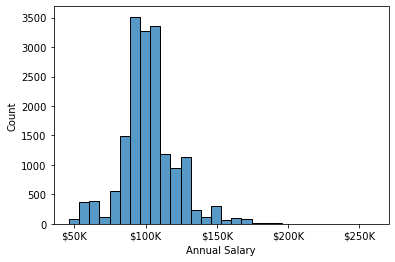

In [51]:
# overall distribtuions 
ax = sns.histplot(data=df2,x='Annual Salary',stat='count',bins=30)
ax.xaxis.set_major_formatter(fmt_thous)

- Removing outliers for visualizations

In [20]:
outliers = np.abs(stats.zscore(df2['Annual Salary']))>3
outliers

0        False
1        False
4        False
6        False
7        False
         ...  
31095    False
31096    False
31097    False
31098    False
31099    False
Name: Annual Salary, Length: 17329, dtype: bool

In [28]:
# def find_outliers_Z(data, verbose=True):
#     outliers = np.abs(stats.zscore(data))>3
    
#     if verbose:
#         print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
#     return outliers


def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

outliers = find_outliers_IQR(df2['Annual Salary'])

- 1862 outliers found in Annual Salary using IQR.


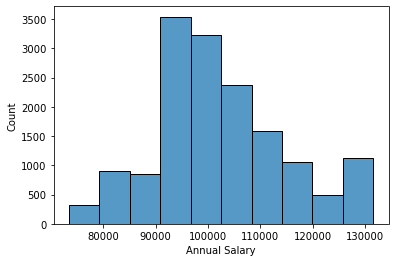

In [37]:
# overall distribtuions 
ax = sns.histplot(data=df2[~outliers],x='Annual Salary',stat='count',bins=10)

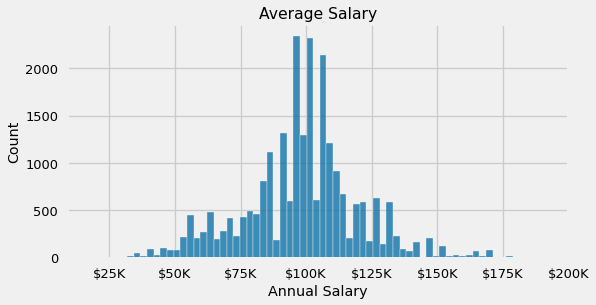

In [69]:
with plt.style.context(['fivethirtyeight','seaborn-talk', 'tableau-colorblind10']):
    
#     outliers = find_outliers_IQR(df2_orig['Annual Salary'])
    outliers = np.zeros_like(df2_orig['Annual Salary']).astype(bool)
    
    
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.histplot(data=df2_orig[~outliers],x='Annual Salary',stat='count',bins=100,ax=ax)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Average Salary')
    ax.set_xlim(right=200_000)

In [73]:
df2_orig['Annual Salary'].mean()

98750.83894099724

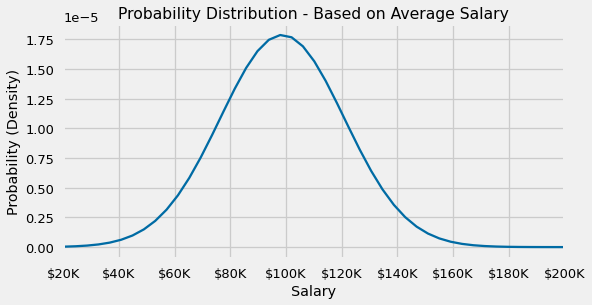

In [94]:
## calculate x values that span the data min - pad_x to data max+pad_x
temp_data = df2_orig.loc[ df2_orig['Annual Salary']< 200_000,'Annual Salary']
xs = x= np.linspace(0,200_000)


pdf = stats.norm.pdf(xs,loc=temp_data.mean(),
                      scale=temp_data.std())

with plt.style.context(['fivethirtyeight','seaborn-talk', 'tableau-colorblind10']):
    fig, ax = plt.subplots(figsize=(8,4))
    
    ax.plot(xs,pdf)
    ax.xaxis.set_major_formatter(fmt_thous)
    ax.set_title('Probability Distribution - Based on Average Salary')
    ax.set_xlim(left=20_000,right=200_000)
    ax.set(ylabel='Probability (Density)', xlabel='Salary')

In [71]:
# stats.normaltest(df2_orig.loc[~outliers, 'Annual Salary'])

### Test df

In [17]:
heroes = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSfpo_ajaImuSJFMrLLVtZhUSzJusEVXGzPxyIixTQydVouT1RMuOZHI-ej3pTHOMPYQRWJM1j2wN8P/pub?output=csv",
                    index_col=0,
                    na_values=['-',-99])
heroes.info()
heroes.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      705 non-null    object 
 2   Eye color   562 non-null    object 
 3   Race        430 non-null    object 
 4   Hair color  562 non-null    object 
 5   Height      517 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  72 non-null     object 
 8   Alignment   727 non-null    object 
 9   Weight      495 non-null    float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


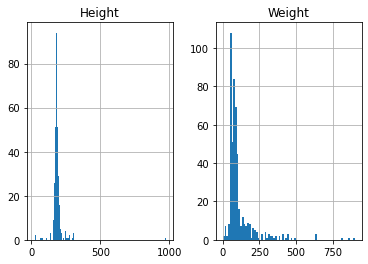

In [19]:
heroes.hist(bins='auto');

### Stats and Dist.  Functions

In [ ]:
def get_group_stats(sample, group, measure="Height", group_col="Gender", 
                    pad_x=2, include_data=True):
    ## Slice out group data
    temp_data = sample.loc[ sample[group_col]==group, [measure]]
    
    ## calculate x values that span the data min - pad_x to data max+pad_x
    xs = x= np.linspace(temp_data.min()-pad_x, temp_data.max()+pad_x)
    
    ## Save initial data to dict (group name, group col)
    group_data = {'group_col':group_col, 'group_name':group,
                  'measure_col':measure,
                  'mean': np.mean(temp_data.values),
                  'std':np.std(temp_data.values)}
    
    pdf = stats.norm.pdf(xs,loc=group_data["mean"], 
                          scale=group_data["std"])
    
    cdf = stats.norm.cdf(xs, loc=group_data["mean"], 
                          scale=group_data["std"])
    group_data['xs'] = xs.flatten()
    group_data['pdf'] = pdf.flatten()
    group_data['cdf'] = cdf.flatten()
    
    if include_data:
        group_data['data'] = temp_data.values.flatten()
    return group_data




In [ ]:
from scipy import stats




def plot_data_vs_normal_dist(scaled_data, return_data=False, figsize=(10,6)):

    ## Generate 1000 x values between min and max
    x = np.linspace(scaled_data.min(),(scaled_data.max()),num=1000)

    ## get the pdf values for the x we created
    pdf = stats.norm.pdf(x,loc=scaled_data.mean(),
                         scale=scaled_data.std())

    ## Return Data 
    if return_data:
        return x, pdf

    # OR visualize
    else:
        
        fig,ax = plt.subplots(figsize=figsize)
        ## Plot histpgram
        sns.histplot(scaled_data,stat='density',fill=False,kde=True,
                        line_kws={'lw':'4'},ax=ax);
        # Plot calculated pdf
        ax.plot(x,pdf,color='red',ls='--',lw=3,label='Normal Dist. PDF')

        ## Annotate
        ax.legend(['KDE','Normal Distrbution PDF'],#bbox_to_anchor=[1,1],
                  prop={'size':'medium'})
        ax.set_title("Comparing Our Data's KDE \nvs. Perfect Normal Distribution",y=1.02);
        # fig.tight_layout()

    
        return fig, ax
    

In [ ]:
plot_data_vs_normal_dist(grp_fire)

In [ ]:
plot_data_vs_normal_dist(grp_police)

In [ ]:
df

In [ ]:
scaled_data = stats.zscore(males['Weight'])
fig, ax = plot_data_vs_normal_dist(scaled_data);
x,pdf = plot_data_vs_normal_dist(scaled_data,return_data=True)